In [4]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Cargamos nuestro archivo de rutas
file = pd.read_csv("routes.csv", sep=",", header = None)
# Visualizamos el archivo
file

,0,1,2,3,4,5,6,7,8
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2
...,...,...,...,...,...,...,...,...,...
67658,ZL,4178,WYA,6334,ADL,3341,NaN,0,SF3
67659,ZM,19016,DME,4029,FRU,2912,NaN,0,734
67660,ZM,19016,FRU,2912,DME,4029,NaN,0,734
67661,ZM,19016,FRU,2912,OSS,2913,NaN,0,734


In [5]:
enlaces  = file[[0,1]].values
enlaces

array([['2B', '410'],
       ['2B', '410'],
       ['2B', '410'],
       ...,
       ['ZM', '19016'],
       ['ZM', '19016'],
       ['ZM', '19016']], dtype=object)

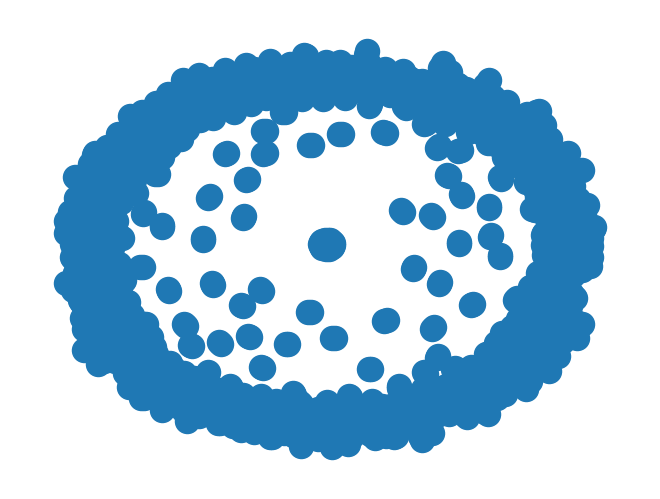

In [8]:
G = nx.Graph()
G.add_edges_from(enlaces)

# Visualizamos el grafo
nx.draw(G)

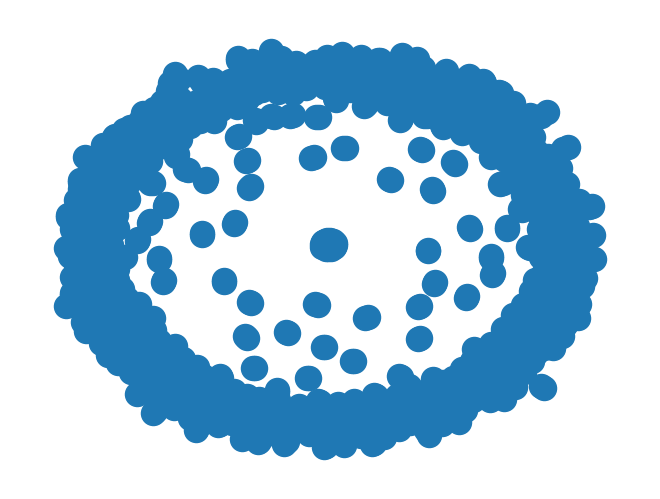

In [10]:
# Ahora lo intentamos con pandas
G = nx.from_pandas_edgelist(file, source=0, target=1)
nx.draw(G)

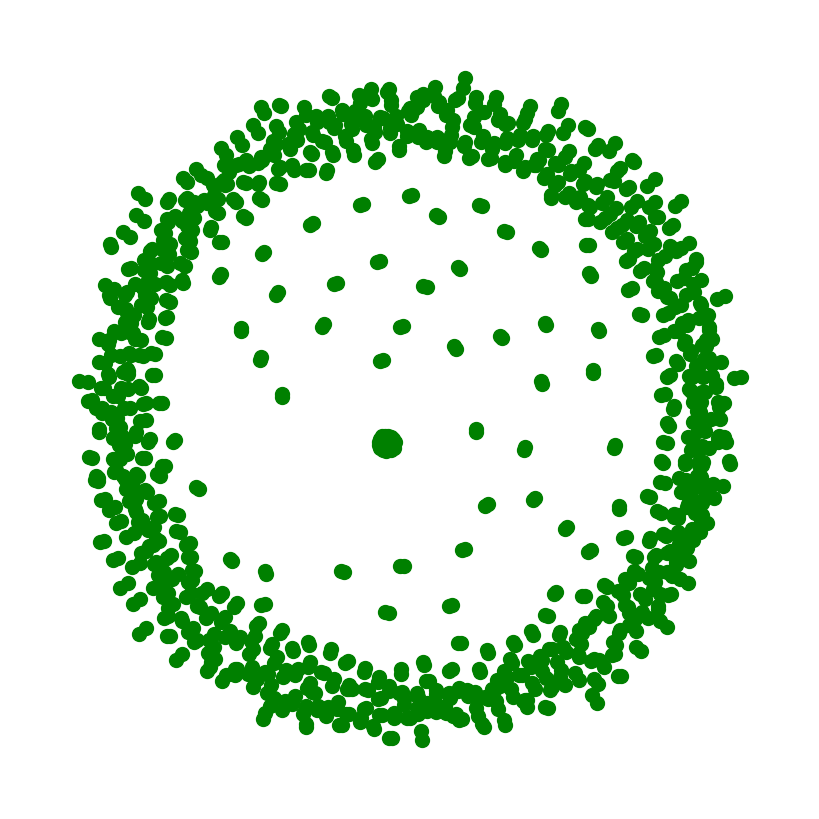

In [11]:
plt.figure(figsize = [8,8])
nx.draw(G, node_size = 100, node_color = 'g', node_shape = 'o')

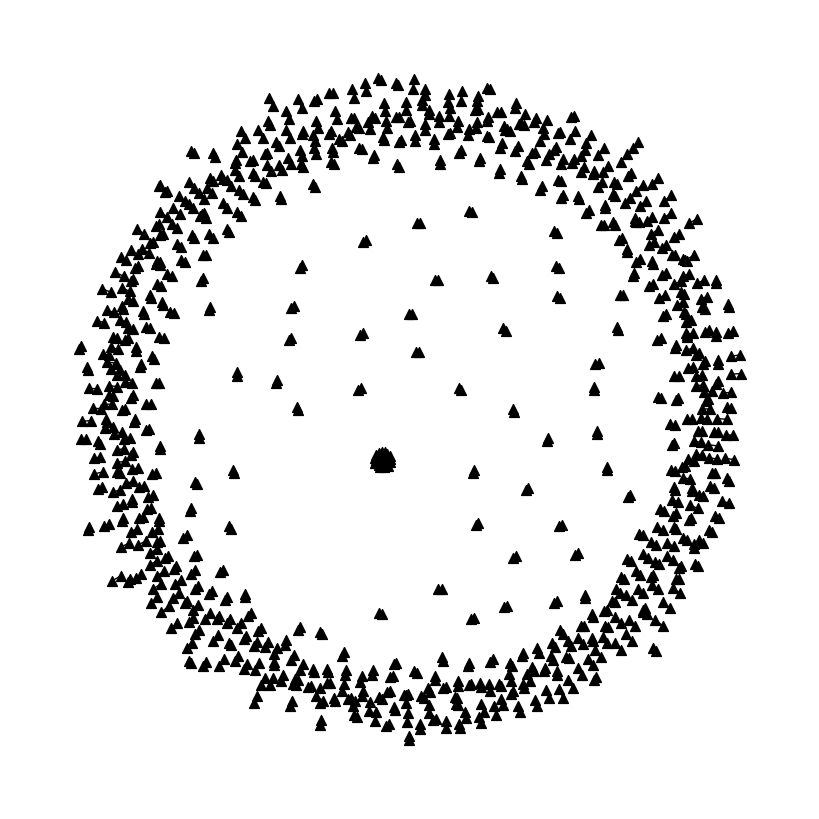

In [12]:
plt.figure(figsize = [8,8])
nx.draw(G, node_size = 50, node_color = 'k', node_shape = '^')

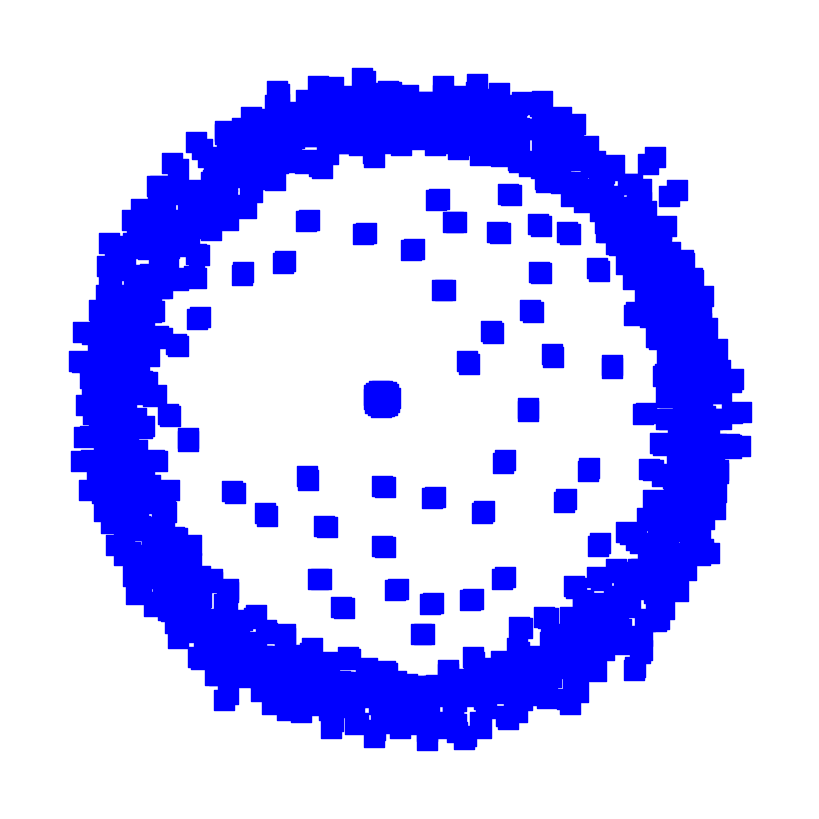

In [13]:
plt.figure(figsize = [8,8])
nx.draw(G, node_size = 200, node_color = 'b', node_shape = 's')

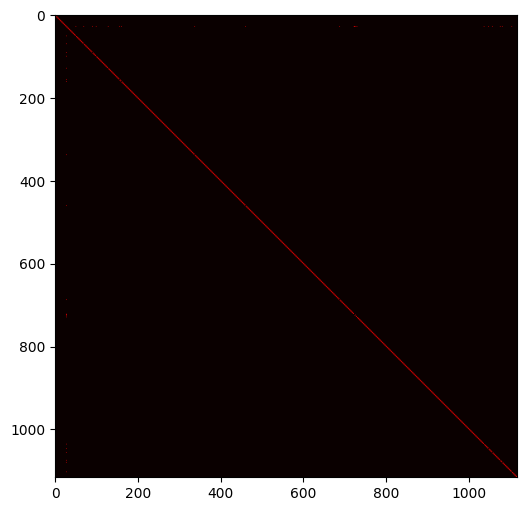

In [14]:
plt.figure(figsize = [6,6])

A = nx.to_numpy_array(G)
plt.imshow(A, 'hot')

# Centralidad de los Nodos

In [18]:
# nx.closeness_centrality(G)
# nx.betweenness_centrality(G)
# nx.degree_centrality(G)
nx.pagerank(G)

{'2B': 0.0008960573476702509,
 '410': 0.0008960573476702509,
 '2G': 0.0008960573476702509,
 '1654': 0.0008960573476702509,
 '2I': 0.0008960573476702509,
 '8359': 0.0008960573476702509,
 '2J': 0.0008960573476702509,
 '470': 0.0008960573476702509,
 '2K': 0.0008960573476702509,
 '1338': 0.0008960573476702509,
 '2L': 0.0008960573476702509,
 '2750': 0.0008960573476702509,
 '2N': 0.0008960573476702509,
 '3652': 0.0008960573476702509,
 '2O': 0.0008960573476702509,
 '146': 0.0008960573476702509,
 '2P': 0.0008960573476702509,
 '897': 0.0008960573476702509,
 '2Z': 0.0008960573476702509,
 '1729': 0.0008960573476702509,
 '3E': 0.0008960573476702509,
 '10739': 0.0008960573476702509,
 '3F': 0.0008960573476702509,
 '16262': 0.0008960573476702509,
 '3G': 0.0008960573476702509,
 '595': 0.0008960573476702509,
 '3H': 0.0005149403767948952,
 '\\N': 0.00889951373605272,
 '3J': 0.0008960573476702509,
 '5521': 0.0008960573476702509,
 '3K': 0.0008960573476702509,
 '3021': 0.0008960573476702509,
 '3L': 0.00089

In [33]:
diccionario = nx.harmonic_centrality(G)
lista = [diccionario[i] for i in G]
sizes = np.array(lista)

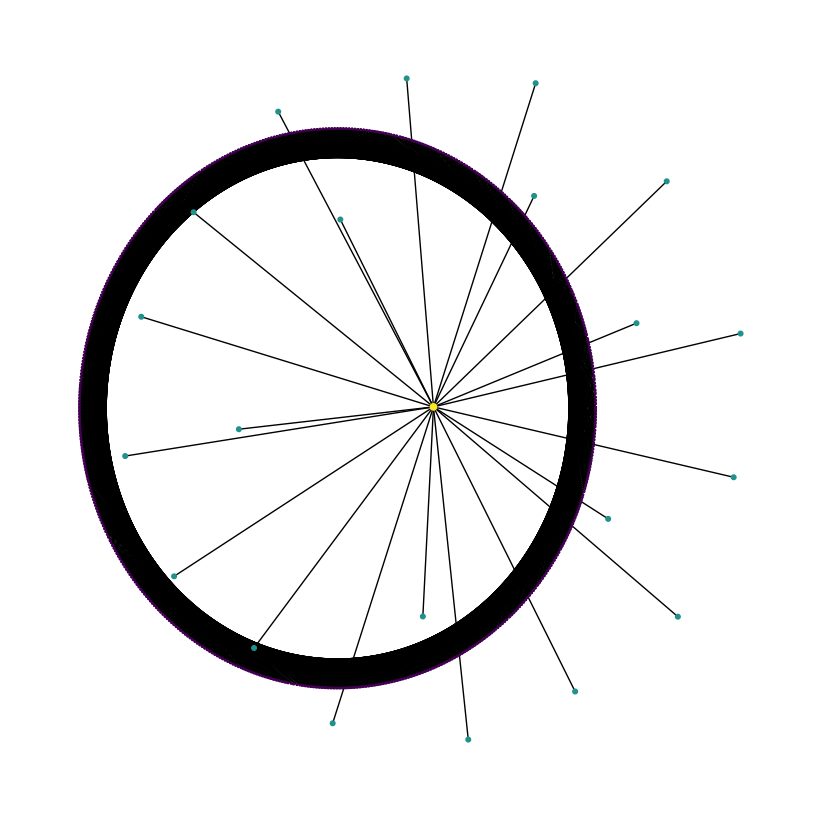

In [36]:
plt.figure(figsize = [8,8] )

nx.draw_kamada_kawai(G,node_size = sizes, node_color = sizes)

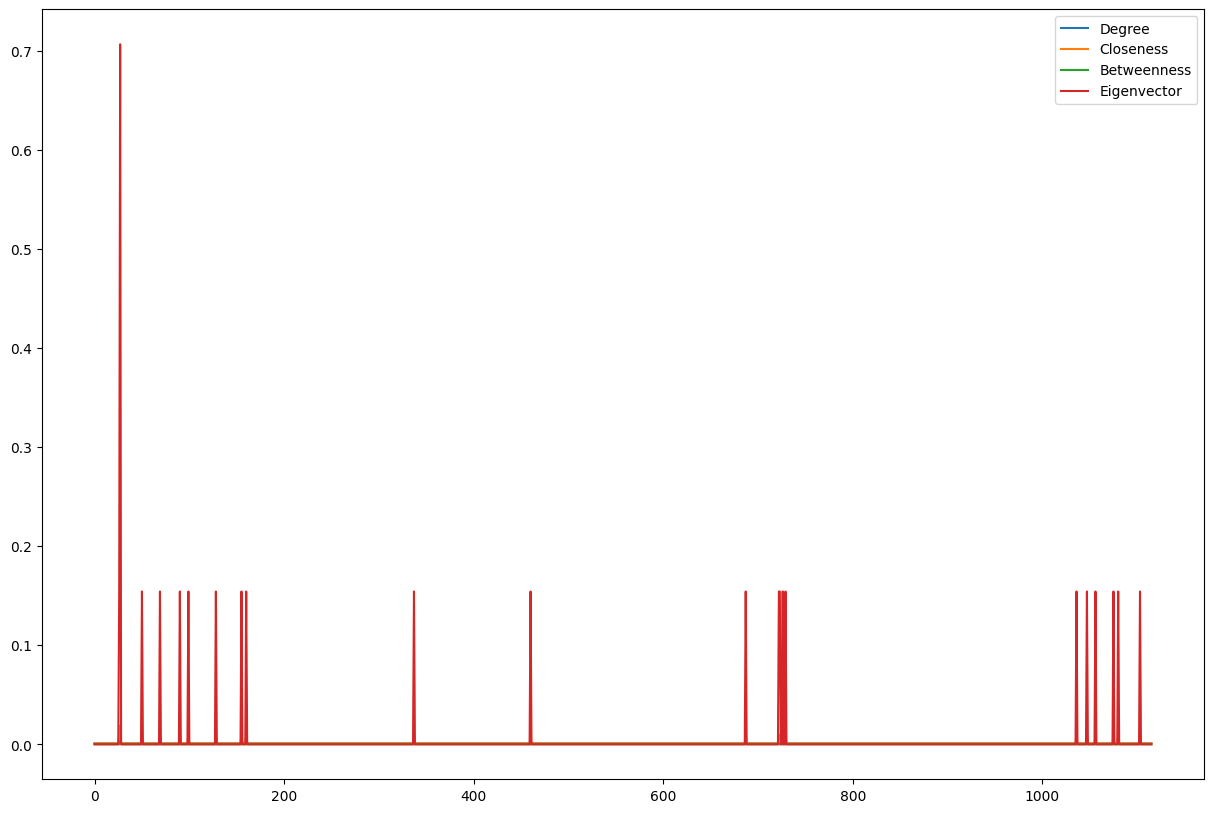

In [29]:
diccionario = nx.degree_centrality(G)
d = np.array([diccionario[i] for i in G])

diccionario = nx.closeness_centrality(G)
c = np.array([diccionario[i] for i in G])

diccionario = nx.betweenness_centrality(G)
b = np.array([diccionario[i] for i in G])

diccionario = nx.eigenvector_centrality(G)
e = np.array([diccionario[i] for i in G])


plt.figure(figsize = [15, 10])
plt.plot(d, label = 'Degree')
plt.plot(c, label = 'Closeness')
plt.plot(b, label = 'Betweenness')
plt.plot(e, label = 'Eigenvector')

plt.legend()

plt.show()

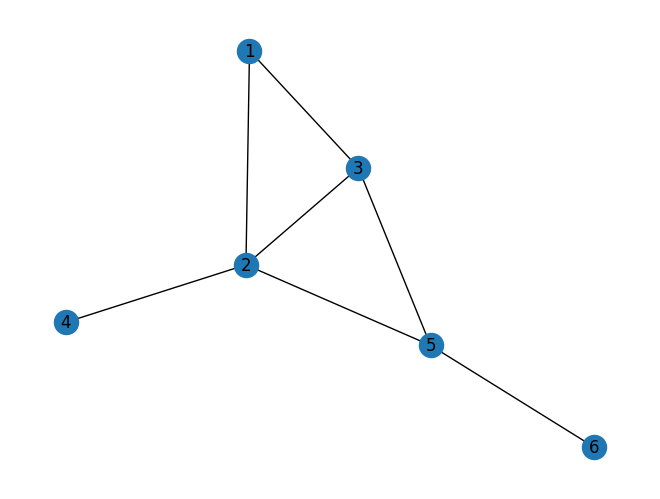

In [30]:
G1 = nx.Graph()
G1.add_nodes_from([1,2,3,4,5,6])
G1.add_edges_from([ (1,2), (1,3), (2,3), (2,4), (2,5), (3,5), (5,6) ])

nx.draw(G1, with_labels = True)

In [31]:
nx.betweenness_centrality(G1, normalized= False, endpoints= True)

{1: 5.0, 2: 10.0, 3: 6.0, 4: 5.0, 5: 9.0, 6: 5.0}